#SELECCION Y ETIQUETADO DE LA DATA

In [433]:
import pandas as pd

In [434]:
data=pd.read_csv('RSS3.csv' , delimiter = ';')
data['circulating-supply'] = data['marketCap']/data['close']
data['timeOpen'] = pd.to_datetime(data['timeOpen'])
data['timeHigh'] = pd.to_datetime(data['timeHigh'])
data['timeLow'] = pd.to_datetime(data['timeLow'])

In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timeOpen            848 non-null    datetime64[ns, UTC]
 1   timeHigh            848 non-null    datetime64[ns, UTC]
 2   timeLow             848 non-null    datetime64[ns, UTC]
 3   name                848 non-null    object             
 4   open                848 non-null    float64            
 5   high                848 non-null    float64            
 6   low                 848 non-null    float64            
 7   close               848 non-null    float64            
 8   volume              848 non-null    float64            
 9   marketCap           848 non-null    float64            
 10  circulating-supply  848 non-null    float64            
dtypes: datetime64[ns, UTC](3), float64(7), object(1)
memory usage: 73.0+ KB


In [436]:
import numpy as np
umbral_capitalizacion = 100000000  # $100 millones
data['marketCap_state'] = data['marketCap'].apply(lambda x: 1 if x >= umbral_capitalizacion else 0)

# Calcular los retornos logarítmicos y la volatilidad diaria
data['volatility'] = data['close'].pct_change().rolling(window=2, min_periods=1).std()
# Determinar si la volatilidad está por encima del percentil 90
data['high_volatility'] = np.where(data['volatility'] > data['volatility'].quantile(0.90), 1, 0)

# Calcular el umbral absoluto del aumento del suministro
umbral_aumento_suministro = 0.05 * data['circulating-supply'][0]  # 5% del suministro inicial
# Determinar si el aumento del suministro supera el umbral
data['supply_increase'] = (data['circulating-supply'].diff() > umbral_aumento_suministro).astype(int)

In [437]:
data = data.iloc[2:].reset_index(drop=True)

In [438]:
data

,timeOpen,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulating-supply,marketCap_state,volatility,high_volatility,supply_increase
0,2024-06-08 00:00:00+00:00,2024-06-08 03:41:00+00:00,2024-06-08 15:10:00+00:00,RSS3,0.327460,0.345714,0.310027,0.322281,13889700.26,311814748.3,9.675258e+08,1,0.004661,0,0
1,2024-06-07 00:00:00+00:00,2024-06-07 07:07:00+00:00,2024-06-07 18:16:00+00:00,RSS3,0.340876,0.362437,0.316819,0.327492,19501915.14,316856544.4,9.675258e+08,1,0.011636,0,0
2,2024-06-06 00:00:00+00:00,2024-06-06 02:59:00+00:00,2024-06-06 20:06:00+00:00,RSS3,0.319530,0.355611,0.314319,0.340876,23789042.18,329806087.3,9.675257e+08,1,0.017465,0,0
3,2024-06-05 00:00:00+00:00,2024-06-05 08:02:00+00:00,2024-06-05 14:32:00+00:00,RSS3,0.312045,0.328883,0.309021,0.319530,8187307.59,309153225.8,9.675258e+08,1,0.073179,0,0
4,2024-06-04 00:00:00+00:00,2024-06-04 00:03:00+00:00,2024-06-04 21:32:00+00:00,RSS3,0.332919,0.335698,0.306969,0.312045,11950009.48,301911669.1,9.675258e+08,1,0.027717,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2022-02-18 00:00:00+00:00,2022-02-18 00:00:00+00:00,2022-02-18 18:38:00+00:00,RSS3,0.373744,0.373744,0.270953,0.279860,7589052.70,0.0,0.000000e+00,0,0.240845,1,0
842,2022-02-17 00:00:00+00:00,2022-02-17 01:01:00+00:00,2022-02-17 18:37:00+00:00,RSS3,0.413072,0.503970,0.361159,0.373956,10198391.68,0.0,0.000000e+00,0,0.446942,1,0
843,2022-02-16 00:00:00+00:00,2022-02-16 00:01:00+00:00,2022-02-16 16:31:00+00:00,RSS3,0.551443,0.556357,0.375153,0.413319,7760471.00,0.0,0.000000e+00,0,0.163320,1,0
844,2022-02-15 00:00:00+00:00,2022-02-15 09:36:00+00:00,2022-02-15 03:11:00+00:00,RSS3,0.385738,0.725280,0.384462,0.550491,27604425.27,0.0,0.000000e+00,0,0.160246,1,0


In [439]:
# Definir la función para etiquetar las predicciones
def etiquetar_prediccion(row):
    if row['marketCap_state'] == 1 and row['high_volatility'] == 0 and (row['supply_increase'] == 0 or pd.isna(row['supply_increase'])):
        return 0  # Aumento en el precio
    elif row['marketCap_state'] == 0 and row['high_volatility'] == 1 and (row['supply_increase'] == 1 or pd.isna(row['supply_increase'])):
        return 1  # Disminución en el precio
    elif row['marketCap_state'] == 1 and row['high_volatility'] == 0 and (row['supply_increase'] == 1 or pd.isna(row['supply_increase'])):
        return 2  # Precio estable
    else:
        return 1

# Aplicar la función para etiquetar las predicciones
data['tags'] = data.apply(etiquetar_prediccion, axis=1)


In [440]:
data

,timeOpen,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulating-supply,marketCap_state,volatility,high_volatility,supply_increase,tags
0,2024-06-08 00:00:00+00:00,2024-06-08 03:41:00+00:00,2024-06-08 15:10:00+00:00,RSS3,0.327460,0.345714,0.310027,0.322281,13889700.26,311814748.3,9.675258e+08,1,0.004661,0,0,0
1,2024-06-07 00:00:00+00:00,2024-06-07 07:07:00+00:00,2024-06-07 18:16:00+00:00,RSS3,0.340876,0.362437,0.316819,0.327492,19501915.14,316856544.4,9.675258e+08,1,0.011636,0,0,0
2,2024-06-06 00:00:00+00:00,2024-06-06 02:59:00+00:00,2024-06-06 20:06:00+00:00,RSS3,0.319530,0.355611,0.314319,0.340876,23789042.18,329806087.3,9.675257e+08,1,0.017465,0,0,0
3,2024-06-05 00:00:00+00:00,2024-06-05 08:02:00+00:00,2024-06-05 14:32:00+00:00,RSS3,0.312045,0.328883,0.309021,0.319530,8187307.59,309153225.8,9.675258e+08,1,0.073179,0,0,0
4,2024-06-04 00:00:00+00:00,2024-06-04 00:03:00+00:00,2024-06-04 21:32:00+00:00,RSS3,0.332919,0.335698,0.306969,0.312045,11950009.48,301911669.1,9.675258e+08,1,0.027717,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2022-02-18 00:00:00+00:00,2022-02-18 00:00:00+00:00,2022-02-18 18:38:00+00:00,RSS3,0.373744,0.373744,0.270953,0.279860,7589052.70,0.0,0.000000e+00,0,0.240845,1,0,1
842,2022-02-17 00:00:00+00:00,2022-02-17 01:01:00+00:00,2022-02-17 18:37:00+00:00,RSS3,0.413072,0.503970,0.361159,0.373956,10198391.68,0.0,0.000000e+00,0,0.446942,1,0,1
843,2022-02-16 00:00:00+00:00,2022-02-16 00:01:00+00:00,2022-02-16 16:31:00+00:00,RSS3,0.551443,0.556357,0.375153,0.413319,7760471.00,0.0,0.000000e+00,0,0.163320,1,0,1
844,2022-02-15 00:00:00+00:00,2022-02-15 09:36:00+00:00,2022-02-15 03:11:00+00:00,RSS3,0.385738,0.725280,0.384462,0.550491,27604425.27,0.0,0.000000e+00,0,0.160246,1,0,1


In [441]:
# Guardar los datos etiquetados
data.to_csv('datos_etiquetados_rss3.csv', index=False)

#ENTRENAMIENTO

In [442]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Eliminar filas con valores NaN en la columna 'tags'
data_clean = data.dropna(subset=['tags'])

# Separar características (X) y etiquetas (y)
X = data_clean[['marketCap_state', 'high_volatility', 'supply_increase']]
y = data_clean['tags']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Inicializar y entrenar el modelo Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con Gradient Boosting
y_pred_gbm = gbm_model.predict(X_test)

# Evaluar el modelo Gradient Boosting
print("\nGradient Boosting Machine:")
print(classification_report(y_test, y_pred_gbm))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       149

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170


Gradient Boosting Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       149

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



#EVALUACION

In [443]:
import pandas as pd
import numpy as np

# Generar datos de prueba
num_samples = 846


# Etiquetas
test_marketCap_state = np.random.randint(0, 2, num_samples)  # 0 o 1 para el estado de capitalización de mercado
test_high_volatility = np.random.randint(0, 2, num_samples)  # 0 o 1 para alta volatilidad
test_supply_increase = np.random.randint(0, 2, num_samples)  # 0 o 1 para el aumento del suministro

# Crear el DataFrame de datos de prueba
test_data = pd.DataFrame({
    'marketCap_state': test_marketCap_state,
    'high_volatility': test_high_volatility,
    'supply_increase': test_supply_increase,

})

# Mostrar los primeros cinco registros del DataFrame de datos de prueba
print("Datos de prueba generados:")
print(test_data.head())


Datos de prueba generados:
   marketCap_state  high_volatility  supply_increase
0                1                1                1
1                1                0                0
2                0                1                0
3                1                0                0
4                0                1                0


In [444]:
# Predicciones con el modelo Random Forest
predicciones_rf_test = rf_model.predict(test_data)

# Predicciones con el modelo Gradient Boosting
predicciones_gbm_test = gbm_model.predict(test_data)

# Imprimir las predicciones
print("Predicciones Random Forest en datos de prueba:", predicciones_rf_test)
print("\nPredicciones Gradient Boosting en datos de prueba:", predicciones_gbm_test)


Predicciones Random Forest en datos de prueba: [1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0
 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 

In [445]:
from sklearn.metrics import accuracy_score


In [446]:
# Etiquetar los datos originales con las mismas condiciones que usaste para etiquetar el conjunto de entrenamiento
y_true = data.apply(etiquetar_prediccion, axis=1)

# Mostrar las primeras cinco etiquetas verdaderas
print("Etiquetas verdaderas:")
print(y_true.head())

Etiquetas verdaderas:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [447]:
test_data.shape

(846, 3)

In [448]:
y_true.shape

(846,)

In [449]:
# Calcular la precisión del modelo Random Forest en los datos de prueba
accuracy_rf = accuracy_score(y_true, predicciones_rf_test)
print("Precisión del modelo Random Forest en datos de prueba:", accuracy_rf)

# Calcular la precisión del modelo Gradient Boosting en los datos de prueba
accuracy_gbm = accuracy_score(y_true, predicciones_gbm_test)
print("Precisión del modelo Gradient Boosting en datos de prueba:", accuracy_gbm)


Precisión del modelo Random Forest en datos de prueba: 0.6891252955082743
Precisión del modelo Gradient Boosting en datos de prueba: 0.6891252955082743


In [450]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


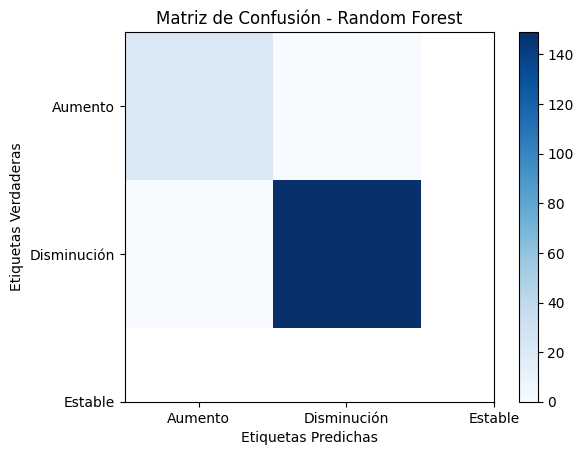

In [451]:
# Matriz de Confusión para el modelo Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.imshow(confusion_matrix_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Matriz de Confusión - Random Forest')
plt.colorbar()
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.xticks([0, 1, 2], ['Aumento', 'Disminución', 'Estable'])
plt.yticks([0, 1, 2], ['Aumento', 'Disminución', 'Estable'])
plt.show()


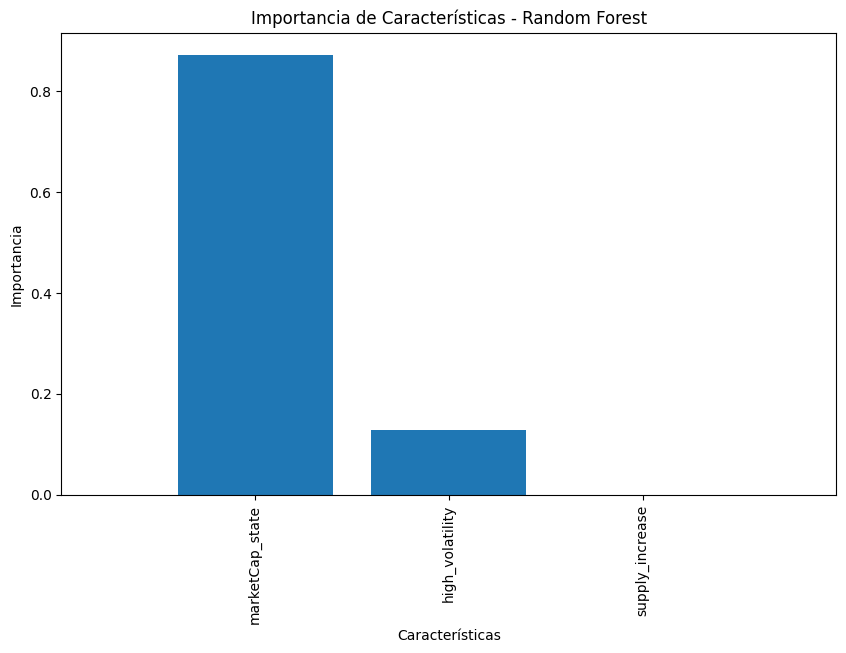

In [452]:
# Obtener la importancia de las características del modelo Random Forest
importances = rf_model.feature_importances_

# Obtener nombres de las características
feature_names = X.columns

# Ordenar las importancias de las características en orden descendente
indices = np.argsort(importances)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()


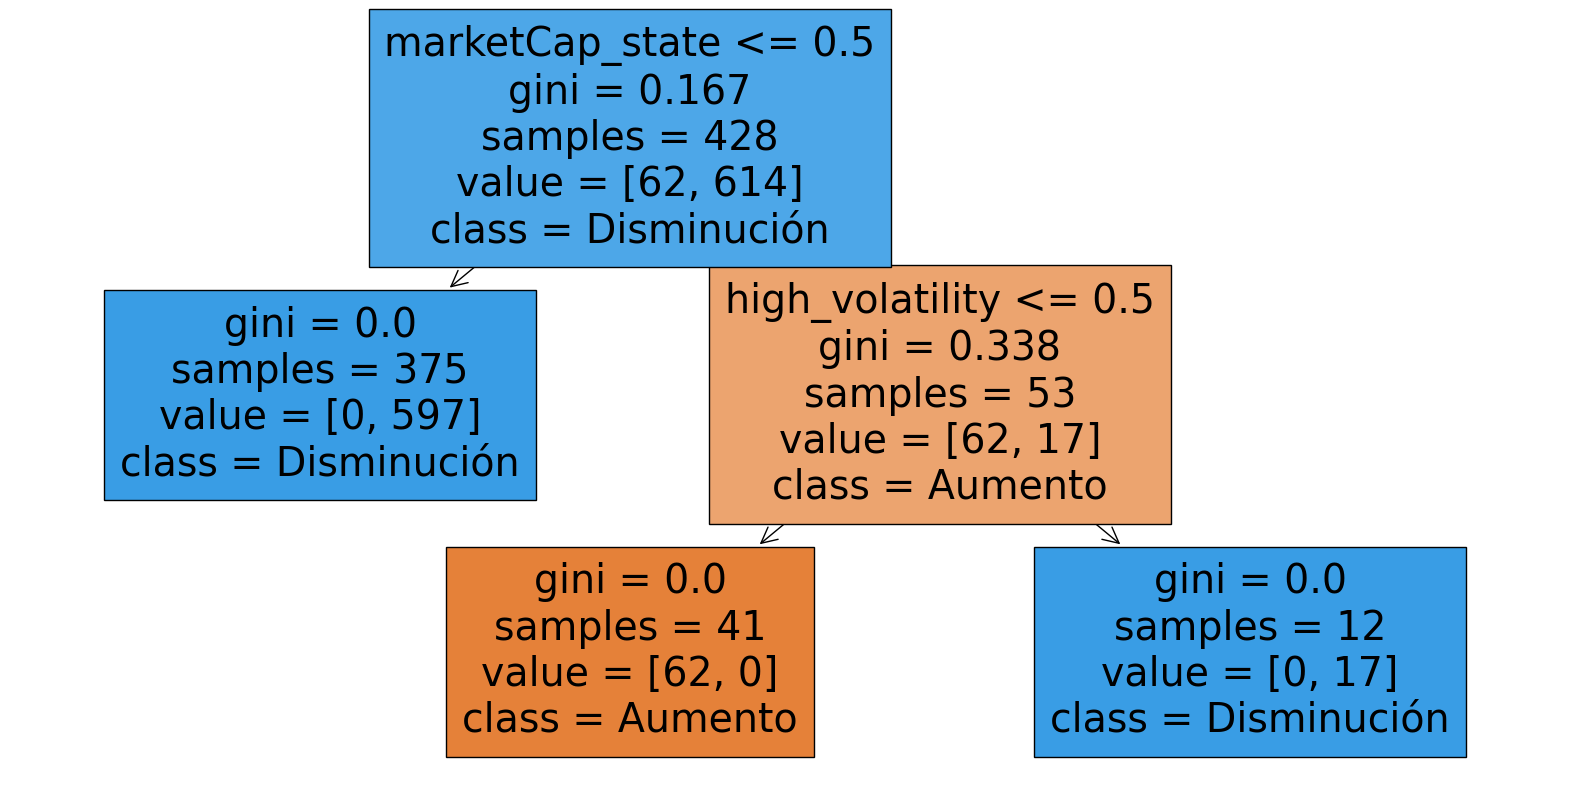

In [453]:
from sklearn.tree import plot_tree

# Obtener un árbol de decisión del modelo Random Forest (o Gradient Boosting)
tree = rf_model.estimators_[0]  # Cambia 0 por el índice del árbol a visualizar

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Aumento', 'Disminución', 'Estable'], filled=True)
plt.show()
